In [1]:
import json
# Create histogram of plaque areas
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from msi_visual.supervised.annotations import get_img, get_visualization, get_dataset

paths = [(r"D:\maldi\slides\slide2_notol_5_bin\0.npy", 1),
        (r"D:\maldi\slides\slide2_notol_5_bin\2.npy", 0),
        (r"D:\maldi\slides\slide2_notol_5_bin\1.npy", 2),
        (r"D:\maldi\slides\slide2_notol_5_bin\3.npy", 3)]
# del img, viz
# for path, index in paths[3:4]:
#     img = get_img(path)
#     viz = get_visualization(rf"C:\Users\Jacob Gildenblat\Desktop\maldi\app\visualizations\{index}_PercentileRatio.png")
#     print(img.shape, viz.shape)

In [27]:
import json
import pandas as pd
from collections import defaultdict
annotation = json.load(open("expAI_NRL4489-s2_json_new4.json"))["_via_img_metadata"]

table = defaultdict(list)

for key in annotation:
    regions = annotation[key]["regions"]        
    if len(regions) == 0:
        continue
    for r in regions:
        
        anatomy = r["region_attributes"]['Allen atlas anatomy']
        category = r["region_attributes"]['category']
        
    
        if 'subcategory' in r["region_attributes"]:
            subcategory = r["region_attributes"]['subcategory']
        else:
            subcategory = ''

        if anatomy == 'bst':
            print(anatomy, category, subcategory)

        table["subcategory"].append(subcategory)
        table["category"].append(category)
        table["Allen atlas anatomy"].append(anatomy)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

csv = pd.DataFrame(table)
parent_categories = list(set(csv[csv["category"] == csv["Allen atlas anatomy"]].category.values))
for p in parent_categories:
    print(csv[csv["category"] == p])

#pd.DataFrame(table).to_csv("annotations.csv")


    subcategory category Allen atlas anatomy
6                    CTX                 CTX
19    isocortex      CTX                 L6b
20    isocortex      CTX                  L4
21    isocortex      CTX                L2-3
29        patho      CTX              plaque
30        patho      CTX              plaque
31        patho      CTX              plaque
32        patho      CTX              plaque
33        patho      CTX              plaque
34        patho      CTX              plaque
35        patho      CTX              plaque
36        patho      CTX              plaque
37        patho      CTX              plaque
51                   CTX                 CTX
56    isocortex      CTX    MOs-MOp-SSps-SSs
57    isocortex      CTX                 PIR
59    isocortex      CTX                  L6
60    isocortex      CTX                  L5
61    isocortex      CTX                  L4
62                   CTX             L4 SALO
63    isocortex      CTX                L2-3
64    isoc

In [15]:
import importlib
import msi_visual.supervised.annotations
importlib.reload(msi_visual.supervised.annotations)
from msi_visual.supervised.annotations import get_dataset
X, y, label_encoder = get_dataset(r"expAI_NRL4489-s2_json_new6.json", paths, subsample=10, ignore=["HPF", "CTX"])
#X, y, label_encoder = get_dataset(r"expAI_NRL4489-s2_json_new4.json", paths, subsample=10)
y = np.array(y)
print(X.shape, y.shape)
print(len(list(label_encoder.classes_)))
print(label_encoder.classes_)

skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
skipping plaque 2_NMF3D_eq.png153094
s

(262, 286, 5255) (262, 286, 3)
0


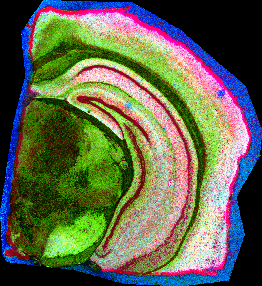

(292, 314, 5255) (292, 314, 3)
polygon
polygon
polygon
3


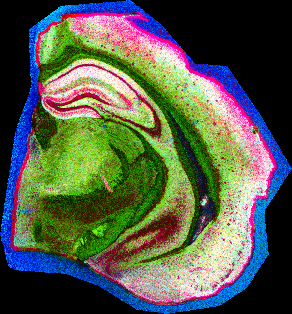

(248, 331, 5255) (248, 331, 3)
polygon
polygon
polygon
polygon
polygon
polygon
polygon
polygon
polygon
polygon
10


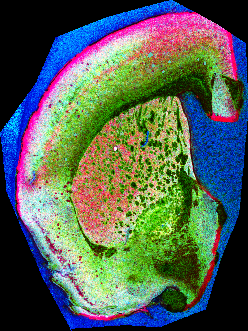

(285, 314, 5255) (285, 314, 3)
0


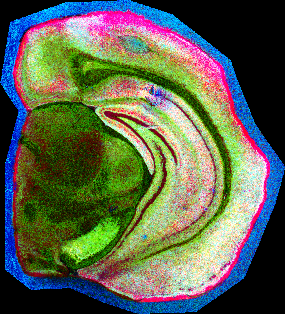

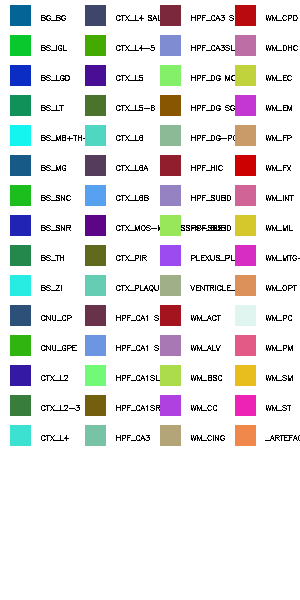

In [6]:
from PIL import Image
import importlib
import msi_visual.supervised.annotations
importlib.reload(msi_visual.supervised.annotations)
from msi_visual.supervised.annotations import get_dataset
from msi_visual.supervised.annotations import get_annotations
import cv2

paths = [(r"D:\maldi\slides\slide2_notol_5_bin\0.npy", 1),
        (r"D:\maldi\slides\slide2_notol_5_bin\2.npy", 0),
        (r"D:\maldi\slides\slide2_notol_5_bin\1.npy", 2),
        (r"D:\maldi\slides\slide2_notol_5_bin\3.npy", 3)]

for path, index in paths:
    annotation_index = path.split("\\")[-1].split(".")[0]
    img = get_img(path)
    viz = get_visualization(rf"C:\Users\Jacob Gildenblat\Desktop\maldi\app\visualizations\{index}_PercentileRatio.png")

    print(img.shape, viz.shape)

    polygons, categories = get_annotations("expAI_NRL4489-s2_json_new4.json", annotation_index, ignore=["HPF", "CTX"], keep=["PLAQUE"])
    rotated_viz = viz.transpose().transpose(1, 2, 0)[::-1, :, :]
    draw = rotated_viz.copy()
    print(len(polygons))
    for polygon, category in zip(polygons, categories):
        category = label_encoder.transform([category])[0]
        category = int(category)
        color = (((category + 1) * 4) % 255, ((category + 1) * 100) % 255, ((category + 1) * 150) % 255)
        color = np.uint8(color)    
        color = int(color[0]), int(color[1]), int(color[2])
        cv2.drawContours(draw, [polygon], -1, color, -1)

    # Create a legend image
    legend_height = 10 * len(label_encoder.classes_)  # Height per class
    legend_width = 300
    legend_img = np.ones((legend_height, legend_width, 3), dtype=np.uint8) * 255

    # Add each class name and color to legend
    num_columns = 4  # Number of columns in the legend
    items_per_column = (len(label_encoder.classes_) + num_columns - 1) // num_columns
    column_width = legend_width // num_columns

    for i, class_name in enumerate(label_encoder.classes_):
        # Get the same color as used in the main visualization
        category = label_encoder.transform([class_name])[0]
        color = (((category + 1) * 4) % 255, ((category + 1) * 100) % 255, ((category + 1) * 150) % 255)
        color = tuple(map(int, color))
        
        # Calculate position in grid
        column = i // items_per_column
        row = i % items_per_column
        
        # Calculate x and y coordinates
        x_offset = column * column_width
        y1 = row * 30
        y2 = (row + 1) * 30
        
        # Draw color rectangle
        cv2.rectangle(legend_img, (x_offset + 10, y1 + 5), (x_offset + 30, y2 - 5), color, -1)
        # Add text label
        cv2.putText(legend_img, class_name, (x_offset + 40, y1 + 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 0), 1)

    display(Image.fromarray(draw))

    del img, viz, rotated_viz

# Display legend
display(Image.fromarray(legend_img))


In [16]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y
)

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
    #max_delta_step=1,  # Helps with class imbalance
)

#xgb_model.fit(X, y)
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
import joblib
joblib.dump(xgb_model, "xgb_model_coarse_ellenatlas.pkl")
#xgb_model = joblib.load("xgb_model_coarse.pkl")



['xgb_model_coarse_ellenatlas.pkl']

['BG_BG' 'BS_IGL' 'BS_LGD' 'BS_LT' 'BS_MB+TH+HY' 'BS_MG' 'BS_SNC' 'BS_SNR'
 'BS_TH' 'BS_ZI' 'CNU_CP' 'CNU_GPE' 'CTX_L2' 'CTX_L2-3' 'CTX_L4'
 'CTX_L4 SALO' 'CTX_L4-5' 'CTX_L5' 'CTX_L5-6' 'CTX_L6' 'CTX_L6A' 'CTX_L6B'
 'CTX_MOS-MOP-SSPS-SSS' 'CTX_PIR' 'CTX_PLAQUE' 'HPF_CA1 SP' 'HPF_CA1 SR'
 'HPF_CA1SLM' 'HPF_CA1SR' 'HPF_CA3' 'HPF_CA3 SP' 'HPF_CA3SLU' 'HPF_DG MO'
 'HPF_DG SG' 'HPF_DG-PO' 'HPF_HIC' 'HPF_SUBD' 'HPF_SUBD SR'
 'PLEXUS_PLEXUS' 'VENTRICLE_VT' 'WM_ACT' 'WM_ALV' 'WM_BSC' 'WM_CC'
 'WM_CING' 'WM_CPD' 'WM_DHC' 'WM_EC' 'WM_EM' 'WM_FP' 'WM_FX' 'WM_INT'
 'WM_ML' 'WM_MTG+FR' 'WM_OPT' 'WM_PC' 'WM_PM' 'WM_SM' 'WM_ST' '_ARTEFACT']


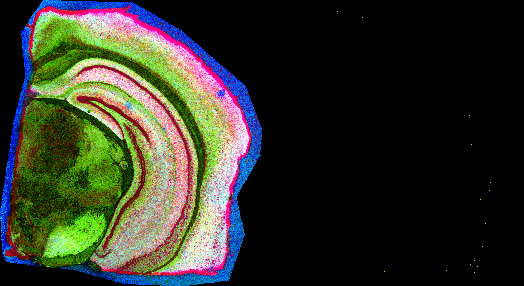

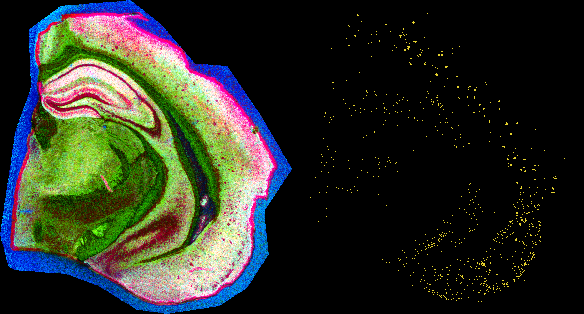

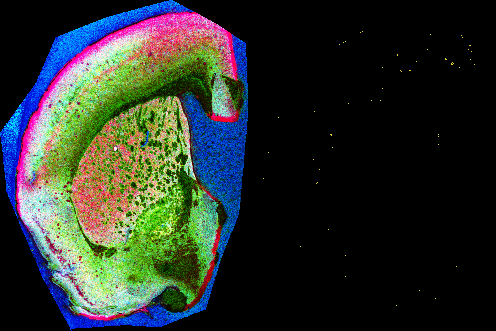

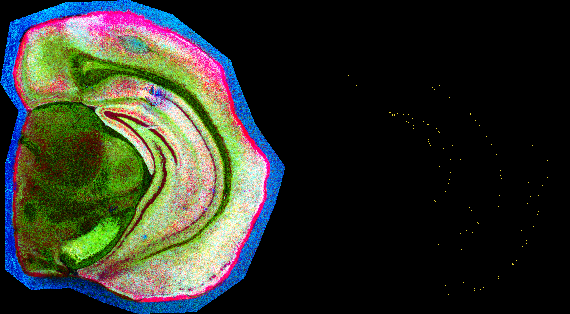

In [18]:
import numpy as np
from PIL import Image
import cv2

def get_detection_mask(rotated, viz_rotated, keep_category=None):
    img_reshaped = rotated.reshape(-1, rotated.shape[-1])
    pred = xgb_model.predict(img_reshaped)
    pred_reshaped = pred.reshape(rotated.shape[:2])
    viz_pred = np.zeros((*pred_reshaped.shape, 3), dtype=np.uint8)
    for label in np.unique(pred_reshaped):
        if keep_category and int(label) not in keep_category:
            continue
        color = (((label + 1) * 50) % 255, ((label + 1) * 90) % 255, ((label + 1) * 12) % 255)
        color = np.uint8(color)
        label_mask = (pred_reshaped == label)
        viz_pred[label_mask] = color
    viz_pred[rotated.max(axis=-1) == 0] = 0
    return viz_pred, pred_reshaped


print(label_encoder.classes_)

for path, index in paths:
    annotation_index = path.split("\\")[-1].split(".")[0]
    img = get_img(path)
    viz = get_visualization(rf"C:\Users\Jacob Gildenblat\Desktop\maldi\app\visualizations\{index}_PercentileRatio.png")

    rotated = img.transpose().transpose(1, 2, 0)[::-1, :, :]
    viz_rotated = viz.transpose(1, 0, 2)[::-1, :, :]
    viz_pred, predictions = get_detection_mask(rotated, viz_rotated, keep_category=label_encoder.transform(["CTX_PLAQUE"]))
    #viz_pred, predictions = get_detection_mask(rotated, viz_rotated)

    both = np.hstack([viz_rotated, viz_pred])
    display(Image.fromarray(both))


# cortex_categories = [c for c in label_encoder.classes_ if "CTX" in c.upper() or "ENTI" in c.upper() or c in ['CA3 sp', 'CA3 sr']]
# cortex_categories = label_encoder.transform(cortex_categories)
# cortex_categories = list(cortex_categories)
# cortex_mask, cortex_predictions = get_detection_mask(rotated, viz_rotated, keep_category=cortex_categories)
# plaque_mask, _ = get_detection_mask(rotated, viz_rotated, keep_category=label_encoder.transform(["plaque"]))
# plaque_mask = np.uint8((plaque_mask > 0).max(axis=-1)) * 255

# both = np.hstack([viz_rotated, viz_pred, cortex_mask])
# display(Image.fromarray(both))
# cortex_mask = np.uint8((cortex_mask > 0).max(axis=-1)) * 255
# kernel = np.ones((3,3), np.uint8)
# cortex_mask = cv2.morphologyEx(cortex_mask, cv2.MORPH_CLOSE, kernel)


# for value in np.unique(cortex_categories):
#     if value == 0:
#         continue
#     mask = np.uint8((cortex_predictions == value)) * 255
#     kernel = np.ones((3,3), np.uint8)
#     #mask = cv2.dilate(mask, kernel, iterations=3)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

#     #display(Image.fromarray(mask))
#     predictions[mask > 0] = value

# display(Image.fromarray(plaque_mask))
# plaque_mask = cv2.bitwise_and(plaque_mask, cortex_mask)


# print(label_encoder.transform(["plaque"]))
# print(np.unique(predictions))

# display(Image.fromarray(cortex_mask))
# display(Image.fromarray(plaque_mask))


In [138]:
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
%matplotlib inline

def get_plaque_features(rotated, plaque_mask, cortex_mask):
    labeled_mask = label(plaque_mask)
    regions = regionprops(labeled_mask)
    plaque_features = []
    plaque_areas = []
    for index in np.unique(labeled_mask):
        if index == 0:
            continue
        plaque_mask = (labeled_mask==index)
        f = rotated[plaque_mask > 0].mean(axis=0)
        plaque_features.append(f)
        plaque_areas.append(regions[index-1].area)
    plaque_features = np.array(plaque_features)
    return plaque_features, plaque_areas, labeled_mask

print(rotated.shape, viz_pred.shape)

plaque_features, plaque_areas, labeled_mask = get_plaque_features(rotated, plaque_mask, cortex_mask)

(331, 248, 5255) (331, 248, 3)


2024-11-11 21:31:06.219 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-11 21:31:06.224 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


setting ion 885.6 885.6
(95, 2) (95, 5255) 95
[0 1 2 3 4 5 6]


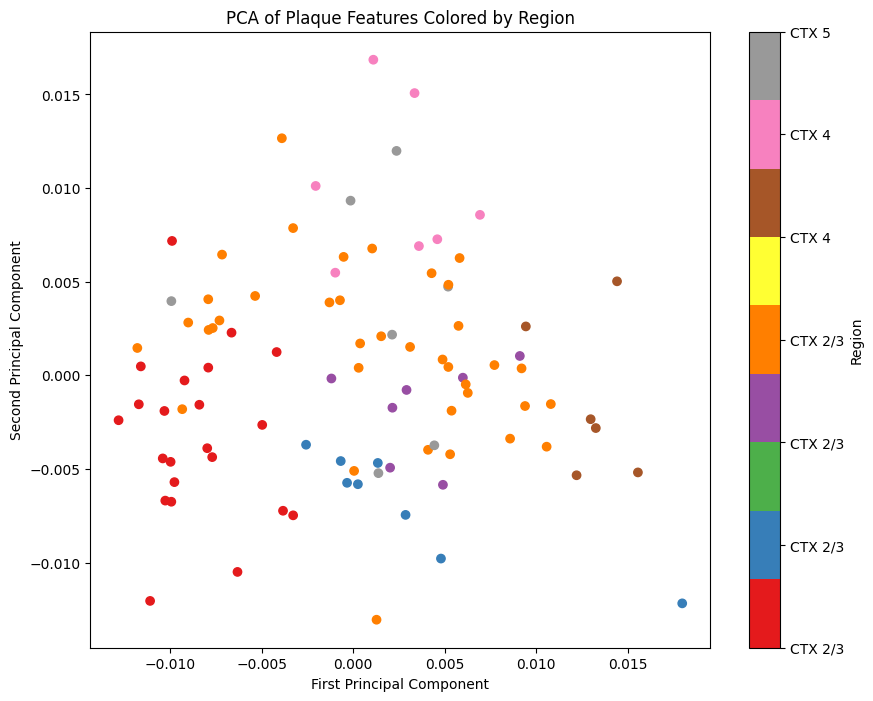

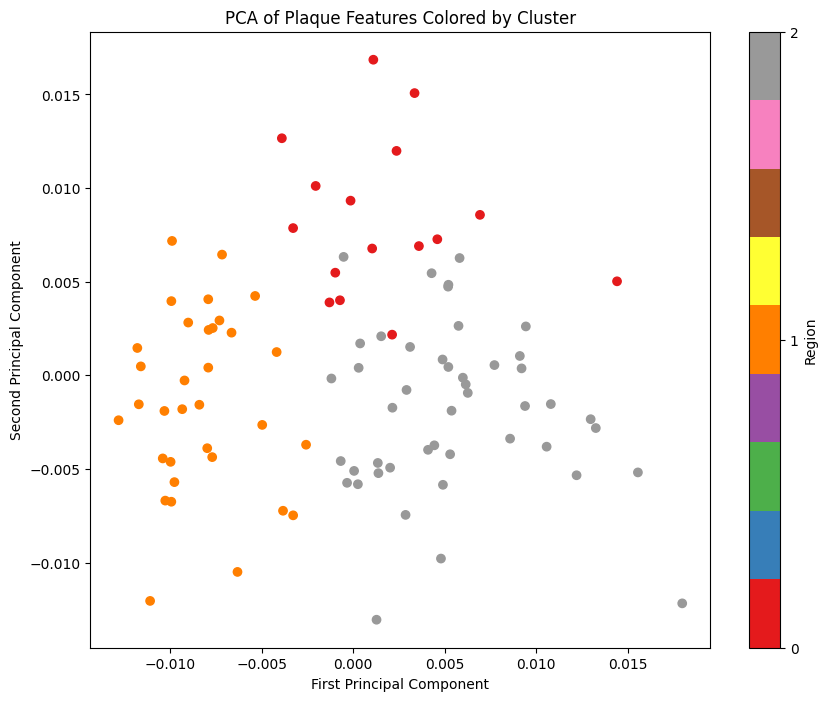

In [139]:
# Use KMeans to cluster plaque features into 3 categories
from sklearn.cluster import KMeans
import cv2
from msi_visual.app.utils.viewer import create_ion_image
from msi_visual.extraction import get_extraction_mz_list
from collections import defaultdict 


if False:
    bics = []
    for k in range(2, 10):
        # Initialize and fit KMeans
        plaque_kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = plaque_kmeans.fit_predict(plaque_features)

        
        from sklearn.metrics import silhouette_score
        sil_score = silhouette_score(plaque_features, cluster_labels)
        bics.append(sil_score)
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, 10), bics, marker='o')
        plt.xticks(range(2, 10))
        plt.xlabel('Number of Plaque Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Evluating the number of Plaque Clusters')
        plt.show()

k = 3
#plaque_kmeans = KMeans(n_clusters=k, random_state=42)
#cluster_labels = plaque_kmeans.fit_predict(plaque_features)

cluster_labels = plaque_kmeans.predict(plaque_features)

draw = np.zeros((*rotated.shape[:2], 3), dtype=np.uint8)

regions_per_plaques = defaultdict(list)

labels_regions = []


for i in sorted(np.unique(labeled_mask)):
    if i == 0:
        continue    
    most_frequent = np.bincount(predictions[labeled_mask == i]).argmax()
    labels_regions.append(most_frequent)
    if label_encoder.inverse_transform([most_frequent])[0] == "plaque":
        continue
    regions_per_plaques[cluster_labels[i-1]].append(label_encoder.inverse_transform([most_frequent])[0])
    colors = [
        [0, 0, 255],      # blue
        [0, 255, 0],      # green 
        [255, 0, 0],      # red
        [255, 0, 255],    # magenta
    ]
    # Color each cluster using the predefined colors
    draw[labeled_mask == i] = colors[cluster_labels[i-1] % len(colors)]


# for category in regions_per_plaques:
#     regions = regions_per_plaques[category]
    
#     # Create a histogram of regions for each plaque category
#     plt.figure(figsize=(12, 6))
#     plt.bar(range(len(set(regions))), [regions.count(r) for r in set(regions)], 
#             tick_label=list(set(regions)))
#     plt.title(f'Distribution of Regions in Plaque Cluster {category}')
#     plt.xlabel('Region Type')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()



extraction_mzs = get_extraction_mz_list(r"D:\maldi\slides\slide2_notol_5_bin")

ion, mz = create_ion_image(rotated, 885.6, extraction_mzs)



overlay = cv2.addWeighted(ion, 0.5, draw, 0.5, 0)

both = np.hstack([ion, draw, overlay])

Image.fromarray(both)


from sklearn.decomposition import PCA
import umap

# Apply PCA to plaque_features
reducer = PCA(n_components=2)
plaque_features_2d = reducer.fit_transform(plaque_features)

print(plaque_features_2d.shape, plaque_features.shape, len(labels_regions))

labels_regions_set = list(set(labels_regions))

labels_region_names = list(label_encoder.inverse_transform(labels_regions))
labels_regions = [labels_regions_set.index(i) for i in labels_regions]



# Create scatter plot
plt.figure(figsize=(10, 8))
print(np.unique(labels_regions))
scatter = plt.scatter(plaque_features_2d[:, 0], plaque_features_2d[:, 1], 
                     c=labels_regions, cmap='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Plaque Features Colored by Region')
plt.colorbar(scatter, label='Region', ticks=range(len(np.unique(labels_regions))), 
             format=lambda x, _: labels_region_names[int(x)])
plt.show()

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(plaque_features_2d[:, 0], plaque_features_2d[:, 1], 
                     c=cluster_labels, cmap='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Plaque Features Colored by Cluster')
plt.colorbar(scatter, label='Cluster', ticks=range(len(np.unique(cluster_labels))))
plt.show()


In [48]:
from msi_visual.extraction import get_extraction_mz_list
extraction_mzs = get_extraction_mz_list(r"D:\maldi\slides\slide2_notol_5_bin")


blue_over_red = (plaque_kmeans.cluster_centers_[0] - plaque_kmeans.cluster_centers_[2]).argsort()[-5 :]
blue_over_red_mzs = [extraction_mzs[i] for i in blue_over_red]


red_over_blue = (plaque_kmeans.cluster_centers_[2] - plaque_kmeans.cluster_centers_[0]).argsort()[-5 :]
red_over_blue_mzs = [extraction_mzs[i] for i in red_over_blue]



green_over_blue = (plaque_kmeans.cluster_centers_[1] - plaque_kmeans.cluster_centers_[0]).argsort()[-5 :]
green_over_blue_mzs = [extraction_mzs[i] for i in green_over_blue]

print("Green over blue: ", green_over_blue_mzs)
print("Red over blue: ", red_over_blue_mzs)
print("Blue over red: ", blue_over_red_mzs)


Green over blue:  [768.6, 835.6, 767.6, 834.6, 766.6]
Red over blue:  [774.6, 747.4, 766.6, 835.6, 834.6]
Blue over red:  [862.6, 888.6, 788.6, 886.6, 885.6]


In [4]:
import shap
import xgboost
# # Create the SHAP explainer
# explainer = shap.TreeExplainer(xgb_model)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X)

# # Print shape of SHAP values to verify dimensions
# print(np.array(shap_values).shape)



booster = xgb_model.get_booster()
shap_values = booster.predict(xgboost.DMatrix(X[::10, :]), pred_contribs=True)
print(shap_values.shape)


d:\miniconda3\envs\dl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(12194, 9, 5256)


In [5]:
from msi_visual.extraction import get_extraction_mz_list
from msi_visual.app.utils.viewer import create_ion_image
from PIL import Image
extraction_mzs = get_extraction_mz_list(r"D:\maldi\slides\slide2_notol_5_bin")

#plaque_index = label_encoder.transform(["plaque"])[0]
#print(len(label_encoder.classes_))
#print(plaque_index)
meanabs = np.abs(shap_values).mean(axis=0)[:, :-1]
# print(meanabs.shape)
# print([extraction_mzs[i] for i in np.argsort(meanabs[plaque_index, :])[-3 :]])
# for mz in [extraction_mzs[i] for i in np.argsort(meanabs[plaque_index, :])[-3 :]]:
#     ion, mz = create_ion_image(img2, mz, extraction_mzs)
#     display(Image.fromarray(ion))


2024-11-14 12:47:30.764 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [6]:
import joblib
data = joblib.load("../scripts/graph_data_coarse_model.joblib")

In [6]:
all_images = [img, img2]
X, y, new_label_encoder = get_dataset(r"expAI_NRL4489-s2_json_new2.json", all_images, subsample=1, ignore=["CTX", "bg"])

In [7]:
features = []
labels = []
label_names = []
for label in np.unique(y):
    indices = np.where(y == label)[0]
    features.append(X[indices].mean(axis=0))
    labels.append(label)

    label_names.append(label_encoder.inverse_transform([label])[0])

features = np.array(features)

print(len(labels), features.shape)

9 (9, 5255)


In [8]:
from sklearn.decomposition import PCA
import math

import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv


def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)



# Apply PCA to plaque_features
reducer = PCA(n_components=2)
features_2d = reducer.fit_transform(features)


# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], 
                     c=labels, cmap=generate_colormap(60))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA annotations')
plt.colorbar(scatter, label='Region', ticks=range(len(np.unique(label_names))), 
             format=lambda x, _: label_names[int(x)])
plt.show()


C:\Users\Jacob Gildenblat\AppData\Local\Temp\ipykernel_7800\3109005524.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


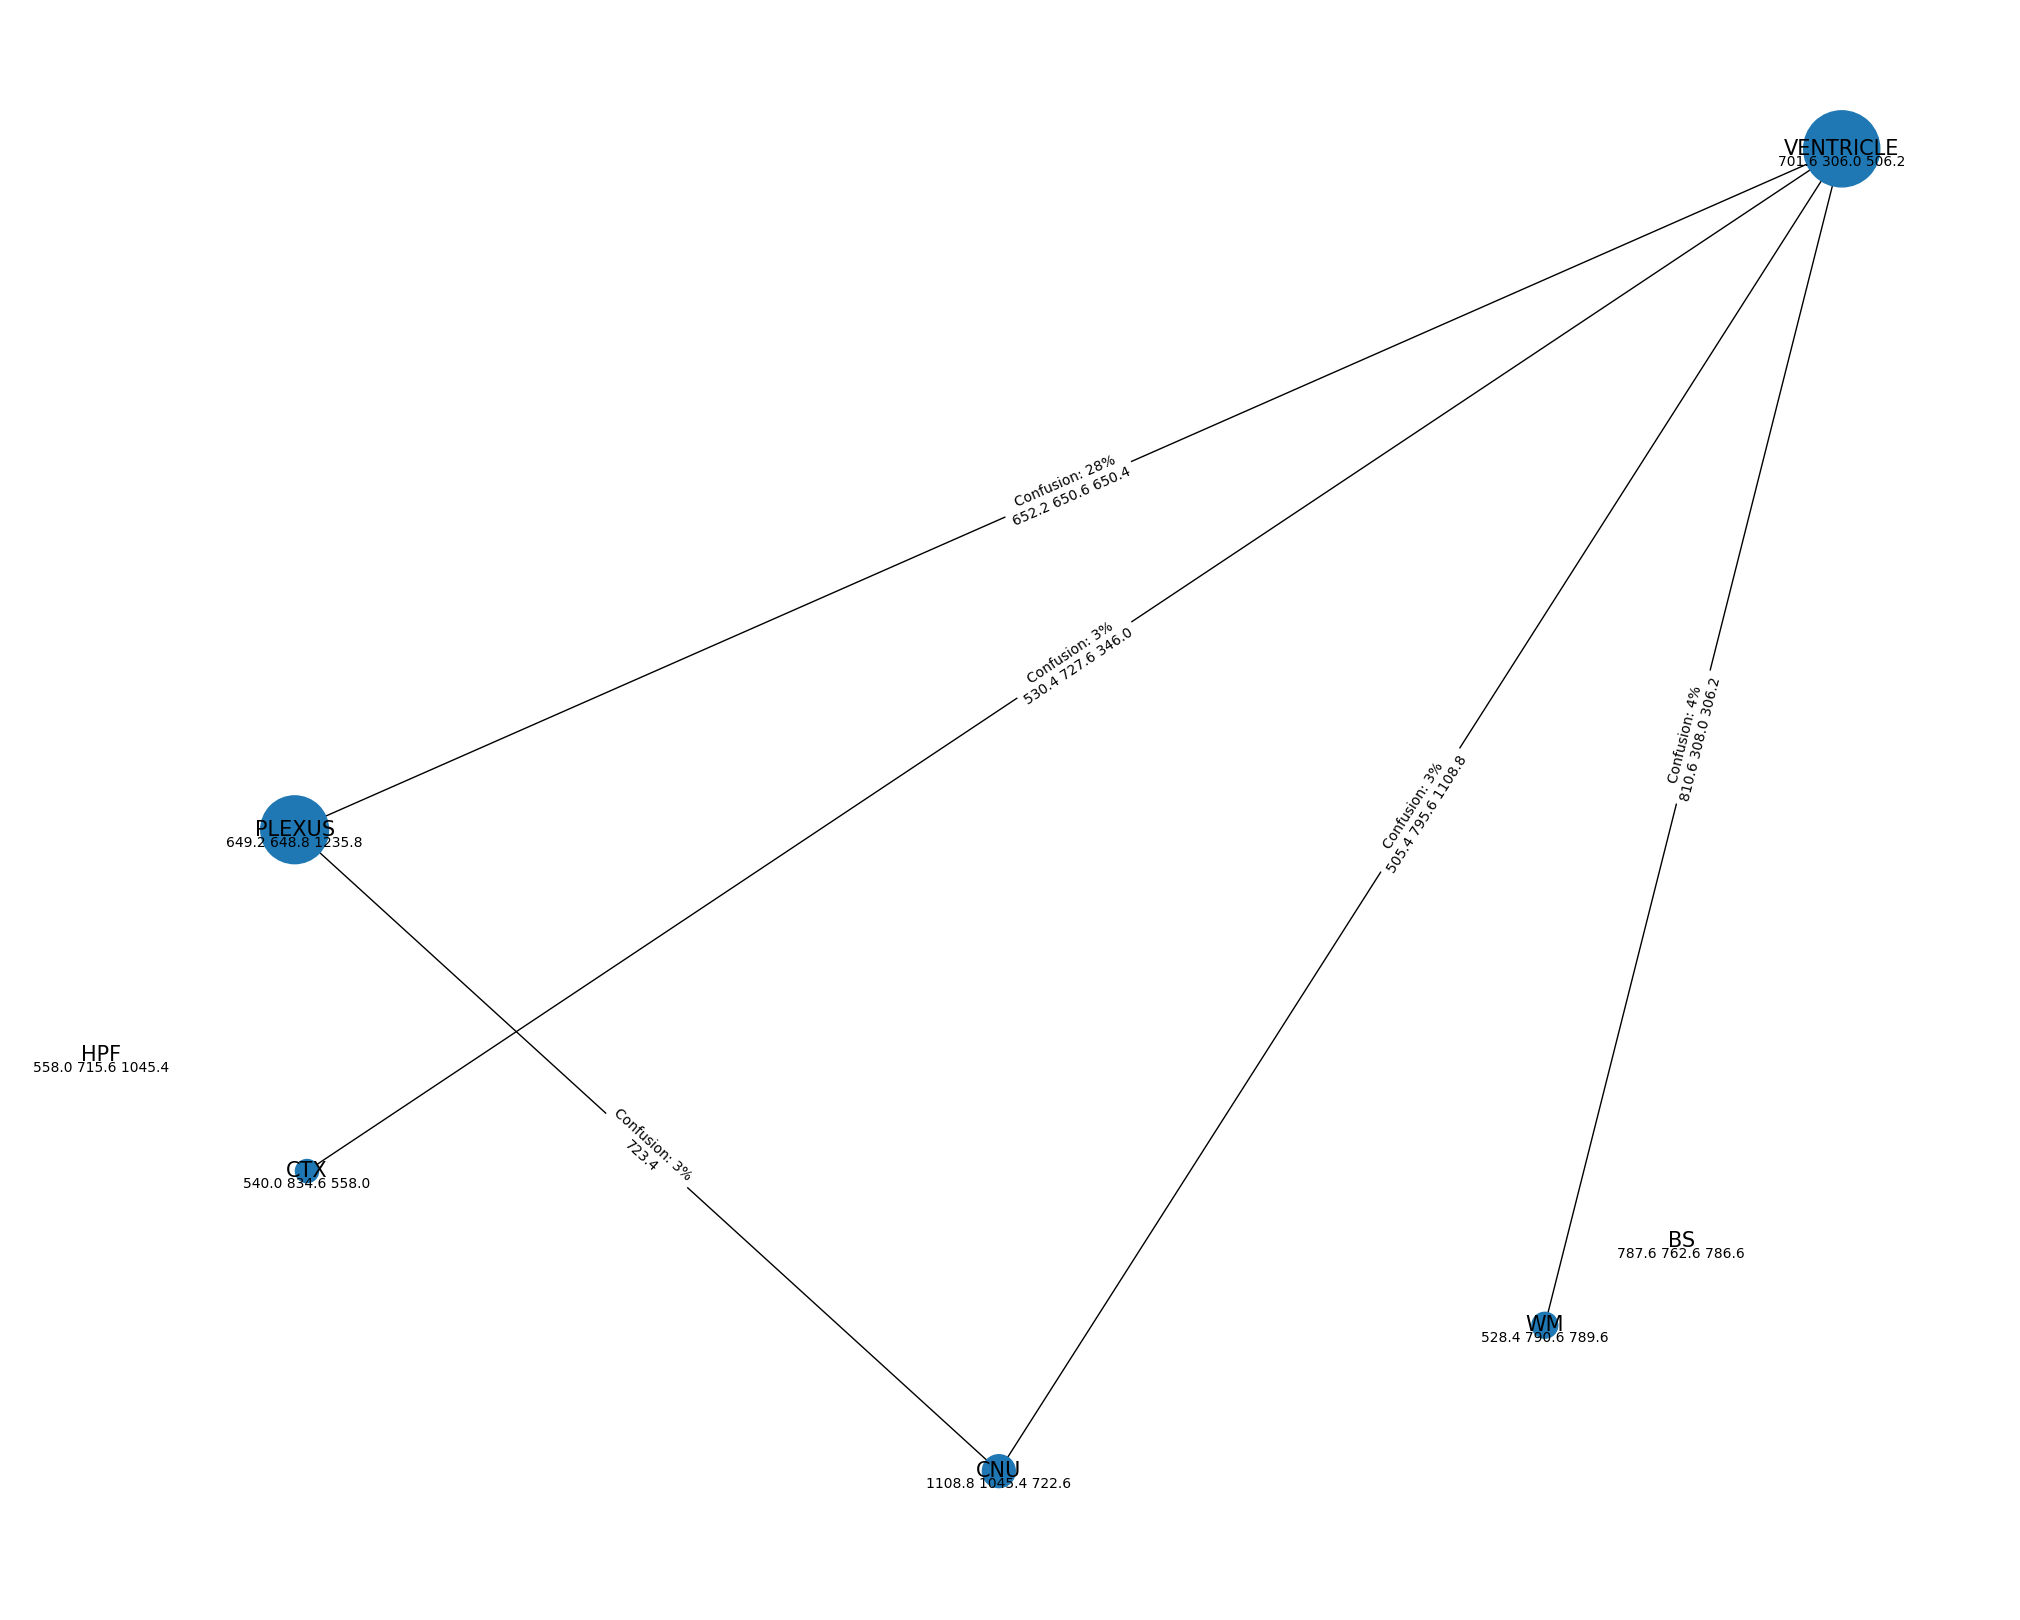

In [13]:
import networkx as nx
from collections import defaultdict
from msi_visual.extraction import get_extraction_mz_list
%matplotlib inline

#abs_shap = np.abs(shap_values).max(axis=0)
extraction_mzs = get_extraction_mz_list(r"D:\maldi\slides\slide2_notol_5_bin")

names = label_names

remove = ["BG", "ARTEFACT", "artefact"]
names = [name for name in names if name not in remove]


features_2d_scaled = features_2d.copy()
    
features_2d_scaled[:, 0] = features_2d_scaled[:, 0] - features_2d_scaled[:, 0].min()
features_2d_scaled[:, 0] = features_2d_scaled[:, 0] / features_2d_scaled[:, 0].max()
features_2d_scaled[:, 0] = features_2d_scaled[:, 0] * 400

features_2d_scaled[:, 1] = features_2d_scaled[:, 1] - features_2d_scaled[:, 1].min()
features_2d_scaled[:, 1] = features_2d_scaled[:, 1] / features_2d_scaled[:, 1].max()
features_2d_scaled[:, 1] = features_2d_scaled[:, 1] * 400



positions = list(zip(features_2d_scaled[:, 0], features_2d_scaled[:, 1]))

plt.figure(figsize=(40//2, 32//2))

edges = []
for (a, b) in data["similarity"].keys():
    if a in remove or b in remove:
        continue
    mzs = []
    us = []
    pvals = []
    messages = []
    val = data["similarity"][(a, b)]
    if val > 0.05:
        for mz, u, pval in data["separation_data"][(a, b)]:
            if pval < 0.05:
                mzs.append(mz)
                us.append(u)
                if u > 0.7 or u < 0.3:
                    messages.append(f"{mz}")

        messages = f"Confusion: {int(100*val)}%\n" +  " ".join(messages[:3]) 

        edges.append((a, b, messages, val))


G = nx.Graph(format='png', directed=False)
for index, name in enumerate(names):
    G.add_node(name, pos=positions[index])

edge_labels = {}
edge_confusions = {}
node_sums = defaultdict(int)
for a, b, label, val in edges:
    G.add_edge(a, b)
    edge_labels[a, b] = label
    edge_confusions[a, b] = val
    node_sums[a] += val
    node_sums[b] += val

layout = dict((n, G.nodes[n]["pos"]) for n in G.nodes())


max_sum = max(node_sums.values())
for a in node_sums:
    node_sums[a] = node_sums[a] / max_sum


d = dict(G.degree)


nx.draw(G, pos=layout, with_labels=True, font_size=15, node_size=[node_sums[n] * 3000 for n in d.keys()])
nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels, font_size=10)



# Add text labels for nodes
for node, pos in layout.items():
    label_index = label_encoder.transform([node])[0]
    if node == "plqaue":
         print(node, label_index)
    mz_indices = np.argsort(meanabs[label_index, :])[-3 : ]
    mzs = [f"{extraction_mzs[i]:.1f}" for i in mz_indices]
    mzs = " ".join(mzs)
    plt.text(pos[0], pos[1] - 5, mzs,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10)



plt.show()

In [21]:
del shap_values


In [66]:
annotations = json.load(open("expAI_NRL4489-s2_json_new2.json", "r"))
prev_files = set(list(annotations.keys()))

In [65]:
new_annotations = json.load(open("expAI_NRL4489-s2_json_new4.json", "r"))["_via_img_metadata"]
new_files = set(list(new_annotations.keys()))


In [85]:
new_annotations = json.load(open("expAI_NRL4489-s2_json_new4.json", "r"))["_via_img_metadata"]
new_annotations["0_NMF3D_eq.png141875"]["file_attributes"]

{}

In [83]:
img2.shape[0] * img2.shape[1]


91688